In [58]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [59]:

books = pd.read_csv('input csv/booklist_ratings.csv', encoding='utf8')
books = books[['books','rating','average_votes']]
print(books.shape)


(194, 3)


In [60]:
movies = pd.read_csv('Transformed_data/CombinedDF.csv', encoding='utf8')
movies = movies[['Title','Movie Rating', 'Book Rating','Movie Revenue']]
print(movies.shape)
movies.head()


(214, 4)


,Title,Movie Rating,Book Rating,Movie Revenue
0,around the world in eighty days,7.8,NaN,NaN
1,body snatchers,5.9,NaN,NaN
2,frankenstein,7.9,3.77,NaN
3,the invisible man,7.7,NaN,NaN
4,journey to the center of the earth,5.8,NaN,101653320.0


In [61]:

from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

def mostsimilar(word, alist):
    scores = [similar(word, word_in_list) for word_in_list in alist]
    return scores.index(max(scores))

indexes_for_movies = []
for bookTitle in list(books['books']):
    indexes_for_movies.append(mostsimilar(bookTitle, list(movies['Title'])))
    

indexes_for_movies
    


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 83,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 26,
 25,
 28,
 29,
 30,
 31,
 32,
 200,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 111,
 191,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 162,
 57,
 58,
 59,
 60,
 61,
 79,
 63,
 64,
 65,
 201,
 67,
 10,
 69,
 70,
 71,
 75,
 74,
 75,
 76,
 110,
 9,
 79,
 80,
 81,
 82,
 8,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 34,
 96,
 121,
 98,
 99,
 100,
 101,
 102,
 103,
 10,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 115,
 107,
 117,
 118,
 120,
 121,
 123,
 109,
 125,
 127,
 128,
 129,
 212,
 131,
 133,
 133,
 134,
 80,
 136,
 137,
 93,
 139,
 140,
 141,
 142,
 143,
 112,
 146,
 147,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 126,
 159,
 160,
 161,
 162,
 10,
 166,
 167,
 168,
 170,
 171,
 173,
 4,
 175,
 74,
 177,
 178,
 179,
 180,
 115,
 182,
 211,
 184,
 185,
 186,
 187,
 19,
 178,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 202,
 32,

In [62]:
len(indexes_for_movies)

194

In [63]:
new_movies_df = movies.iloc[indexes_for_movies,:]
print(new_movies_df.shape)
new_movies_df.head()

(194, 4)


,Title,Movie Rating,Book Rating,Movie Revenue
0,around the world in eighty days,7.8,NaN,NaN
1,body snatchers,5.9,NaN,NaN
2,frankenstein,7.9,3.77,NaN
3,the invisible man,7.7,NaN,NaN
4,journey to the center of the earth,5.8,NaN,101653320.0


In [64]:
merged_df = new_movies_df
for column_i in np.arange(books.shape[1]):
    merged_df[books.columns[column_i]] = books.iloc[:,column_i]

print(merged_df.shape)
merged_df = merged_df.rename(columns={'Title': 'Movie Title'})
merged_df.head()

(194, 7)


C:\Users\naime\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Movie Title,Movie Rating,Book Rating,Movie Revenue,books,rating,average_votes
0,around the world in eighty days,7.8,NaN,NaN,Around the World in Eighty Days (Extraordinary...,3.92,156095.0
1,body snatchers,5.9,NaN,NaN,Invasion of the Body Snatchers,3.89,17372.0
2,frankenstein,7.9,3.77,NaN,Frankenstein,3.77,992097.0
3,the invisible man,7.7,NaN,NaN,Invisible Man,3.85,139953.0
4,journey to the center of the earth,5.8,NaN,101653320.0,Journey to the Center of the Earth (Extraordin...,3.85,126361.0


In [65]:
merged_df.to_csv('Transformed_data/merged_book_and_movie_titles.csv', index=False, encoding='utf8')

In [68]:
ratings_df = merged_df[['Movie Rating', 'rating']]
ratings_df = ratings_df.rename(columns={'rating': 'Book Rating'})
ratings_df.dropna(inplace=True)

print(ratings_df.shape)
ratings_df.head()

(157, 2)


,Movie Rating,Book Rating
0,7.8,3.92
1,5.9,3.89
2,7.9,3.77
3,7.7,3.85
4,5.8,3.85


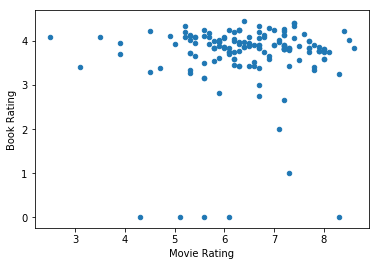

In [69]:
ratings_df.plot('Movie Rating', 'Book Rating', kind='scatter')
plt.show()

In [70]:
max(ratings_df['Movie Rating'])

8.5999999999999996

In [57]:
merged_df['Movie Revenue'].dropna()

Series([], Name: Movie Revenue, dtype: float64)